In [42]:
import sys
sys.path.append('../utils')
import os
import image_cropp_utils

from image_cropp_utils import read_image

dir_base = '/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/'
filename = 'p5_cropped_image_overlap_comparison.btf'
img = read_image(dir_base + filename)

In [43]:
import staintools
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def load_and_preprocess_image(image_path):
    image = io.imread(image_path)
    image = staintools.LuminosityStandardizer.standardize(image.astype(np.uint8))
    return image

# Load and preprocess images
image_file = '../data/raw/pannuke/Fold 1/images/fold1/images.npy'
images = np.load(image_file)
image = images[1].astype(np.uint8)

# Ensure the image is properly scaled and normalized
image = staintools.LuminosityStandardizer.standardize(image)

# Instantiate and fit the Macenko normalizer
normalizer = staintools.StainNormalizer(method='macenko')

dir_base = '/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/'
filename = 'p5_cropped_image_overlap_comparison.btf'
target_image = img.astype(np.uint8)

# Fit the normalizer with the target image
normalizer.fit(target_image)

# Apply normalization to the source image
normalized_image = normalizer.transform(image)


In [44]:
print(normalized_image)

[[[210  55 197]
  [209  61 198]
  [207  67 200]
  ...
  [220  72 207]
  [228  80 213]
  [231  99 219]]

 [[210  55 197]
  [209  61 198]
  [207  67 200]
  ...
  [220  72 207]
  [228  80 213]
  [231  99 219]]

 [[210  64 200]
  [210  65 200]
  [210  65 200]
  ...
  [222  63 205]
  [225  80 212]
  [230  93 218]]

 ...

 [[207  29 183]
  [212  35 188]
  [222  47 199]
  ...
  [237 148 232]
  [240 161 235]
  [243 167 238]]

 [[204  32 183]
  [211  34 188]
  [222  50 200]
  ...
  [236 133 229]
  [240 140 232]
  [241 152 235]]

 [[205  29 182]
  [209  37 188]
  [223  48 200]
  ...
  [233 112 223]
  [239 120 228]
  [240 140 232]]]


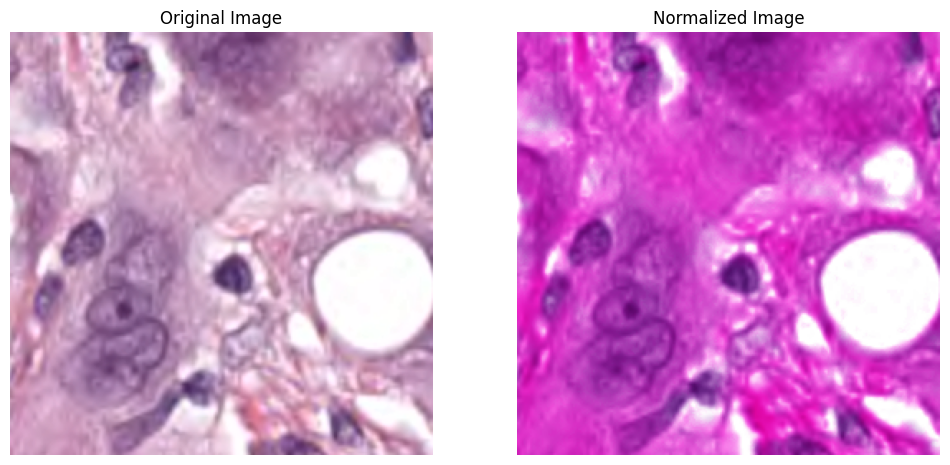

In [45]:
# Display the original and normalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image.astype(int))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_image.astype(int))
plt.title('Normalized Image')
plt.axis('off')

plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt

image_file = '../data/raw/pannuke/Fold 1/images/fold1/images.npy'
mask_file = '../data/raw/pannuke/Fold 1/masks/fold1/masks.npy'

images = np.load(image_file)
masks = np.load(mask_file)

In [50]:
types_path = '../data/raw/pannuke/Fold 1/images/fold1/types.npy' 
types = np.load(types_path)

print(f"Types shape: {types.shape}")
print(f"Unique types: {np.unique(types)}")

Types shape: (2656,)
Unique types: ['Adrenal_gland' 'Bile-duct' 'Bladder' 'Breast' 'Cervix' 'Colon'
 'Esophagus' 'HeadNeck' 'Kidney' 'Liver' 'Lung' 'Ovarian' 'Pancreatic'
 'Prostate' 'Skin' 'Stomach' 'Testis' 'Thyroid' 'Uterus']


In [52]:
single_masks = masks[:, :, :, -1]
single_masks = np.expand_dims(single_masks, axis=-1)
single_masks.shape
types_file = '../data/raw/pannuke/Fold 1/images/fold1/types.npy'
types = np.load(types_file)
colon_indices = np.where(np.logical_or(types == 'Colon', types == 'Stomach', types == 'Esophagus'))[0]

# Convert to list if needed
colon_indices_list = colon_indices.tolist()

single_masks = single_masks[colon_indices_list]

In [61]:
import numpy as np

# Filter out masks where all values are 1
non_all_ones_indices = [i for i, mask in enumerate(single_masks) if not (np.all(mask == 1) or np.all(mask == 0))]

# Filter the images and masks using these indices
filtered_images = images[non_all_ones_indices]
filtered_masks = single_masks[non_all_ones_indices]

print(f"Filtere number of images: {len(filtered_images)}")
print(f"# of masks after filtering: {len(filtered_masks)}")

Filtere number of images: 485
# of masks after filtering: 485


In [63]:
import staintools
import numpy as np
from skimage import io

def load_and_preprocess_image(image):
    image = staintools.LuminosityStandardizer.standardize(image.astype(np.uint8))
    return image

# Load the images
images = filtered_images

# Load and preprocess the target image for normalization
dir_base = '/Users/lollijagladiseva/Desktop/cellseg_visium_hd/data/processed/'
filename = 'p5_cropped_image_overlap_comparison.btf'
target_image = img.astype(np.uint8)

# Instantiate the Macenko normalizer and fit with the target image
normalizer = staintools.StainNormalizer(method='macenko')
normalizer.fit(target_image)

# Normalize all images
for i in range(images.shape[0]):
    # Preprocess and normalize the image
    image = load_and_preprocess_image(images[i])
    normalized_image = normalizer.transform(image)
    
    # Save the normalized image back to the array
    images[i] = normalized_image

# Save the normalized images back to the same file
image_file = '../data/raw/pannuke/Fold 1/images/fold1/images_macenko.npy'
np.save(image_file, images)


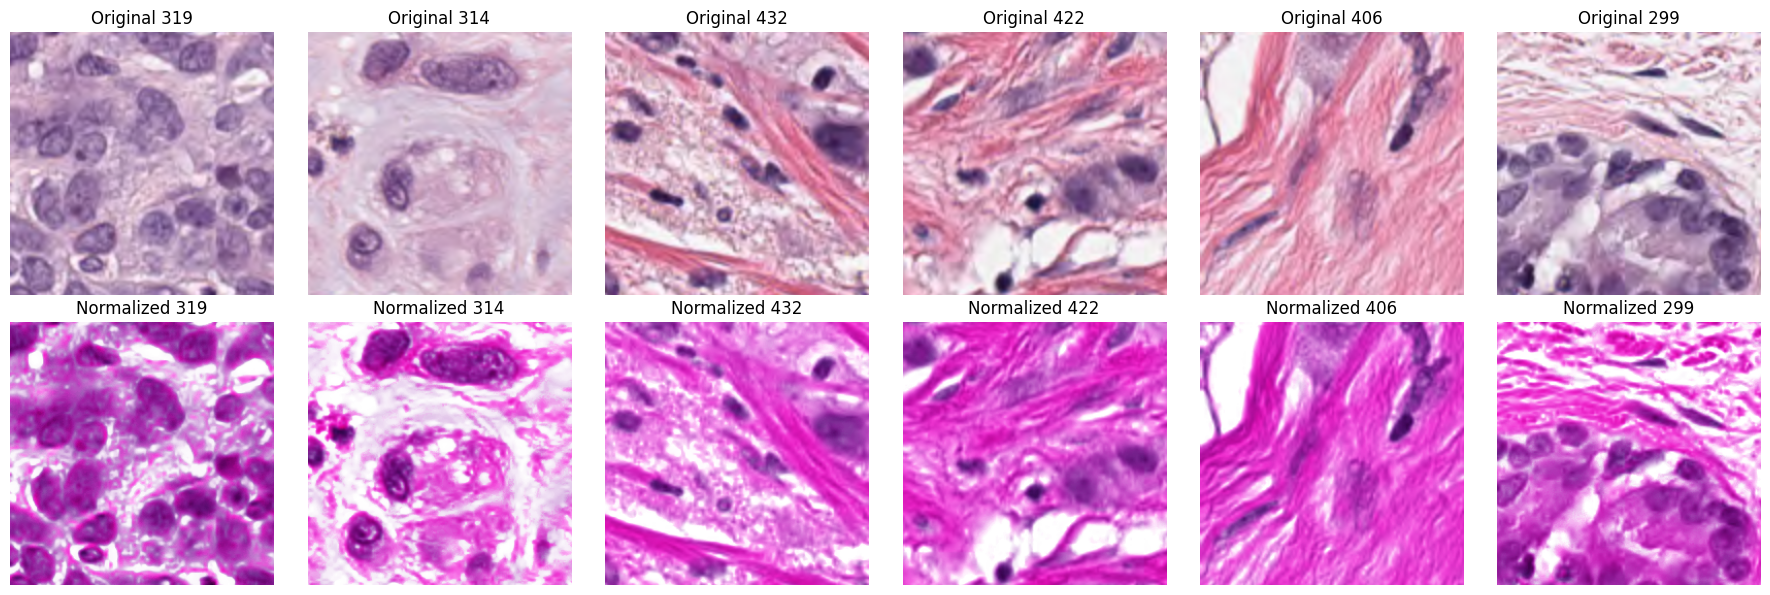

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random

images_macenko_file = '../data/raw/pannuke/Fold 1/images/fold1/images_macenko.npy'
images_macenko = np.load(images_macenko_file)

random_indices = random.sample(range(filtered_images.shape[0]), 6)

fig, axes = plt.subplots(2, 6, figsize=(18, 6))

for i, idx in enumerate(random_indices):
    # Plot original image
    axes[0, i].imshow(filtered_images[idx].astype(np.uint8))
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {idx}')

    # Plot normalized image
    axes[1, i].imshow(images_macenko[idx].astype(np.uint8))
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Normalized {idx}')

plt.tight_layout()
plt.show()